## **Parte 2: Múltiples gráficos con matplotlib (subplots)**

En esta segunda parte vamos a repetir los mismos ejercicios de la Parte 1, pero ahora desglosando los resultados por centro o facultad de la UAM. El objetivo es aprender a trabajar con múltiples gráficos en una misma figura (subplots) y a mejorar su presentación visual. Todos los gráficos deben realizarse con la librería matplotlib. No se especifica la disposición de los subplots ni las modificaciones de estilo que debes aplicar: deberás decidir qué organización es más adecuada en cada caso (rejilla de subplots, disposición por filas o columnas, etc.). En el notebook, tras cada figura deberás escribir una breve justificación explicando por qué has elegido esa representación con subplots y, en caso de haber aplicado modificaciones de estilo 
(como compartir ejes, unificar la leyenda, modificar colores o tipografías, ajustar espaciados, etc.), deberás justificar también esas decisiones de diseño. 

### **Apartado 1: Participación por estamento y centro (2021)**

Representa los porcentajes de participación por estamento, desglosados por centro, para la primera y la segunda vuelta de las elecciones de 2021. Cada subplot debe mostrar los datos de un centro distinto. Una vez realizado, responde a la siguiente pregunta:
 
- ¿Qué centro y qué estamento tuvo la máxima participación en cada una de las vueltas de las elecciones de 2021?

**Justificación de la visualización:**

Para comparar la participación por estamento y centro en las elecciones de 2021, se utiliza una figura con subplots, donde cada subplot representa un centro distinto. Esta organización permite:
- Comparar visualmente la participación entre estamentos dentro de cada centro.
- Observar diferencias y similitudes entre centros de forma clara y ordenada.
- Facilitar la identificación de centros y estamentos con mayor o menor participación.

Se ha optado por gráficos de barras en cada subplot, ya que permiten comparar fácilmente los porcentajes de participación entre estamentos. La disposición de los subplots puede ser en cuadrícula o en filas/columnas, según el número de centros y la legibilidad.

Además, se responde a la pregunta: ¿Qué centro y qué estamento tuvo la máxima participación en cada una de las vueltas de las elecciones de 2021?

/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_27994/507484933.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valores = participacion_v1[centro].reindex(estamentos).fillna(0)


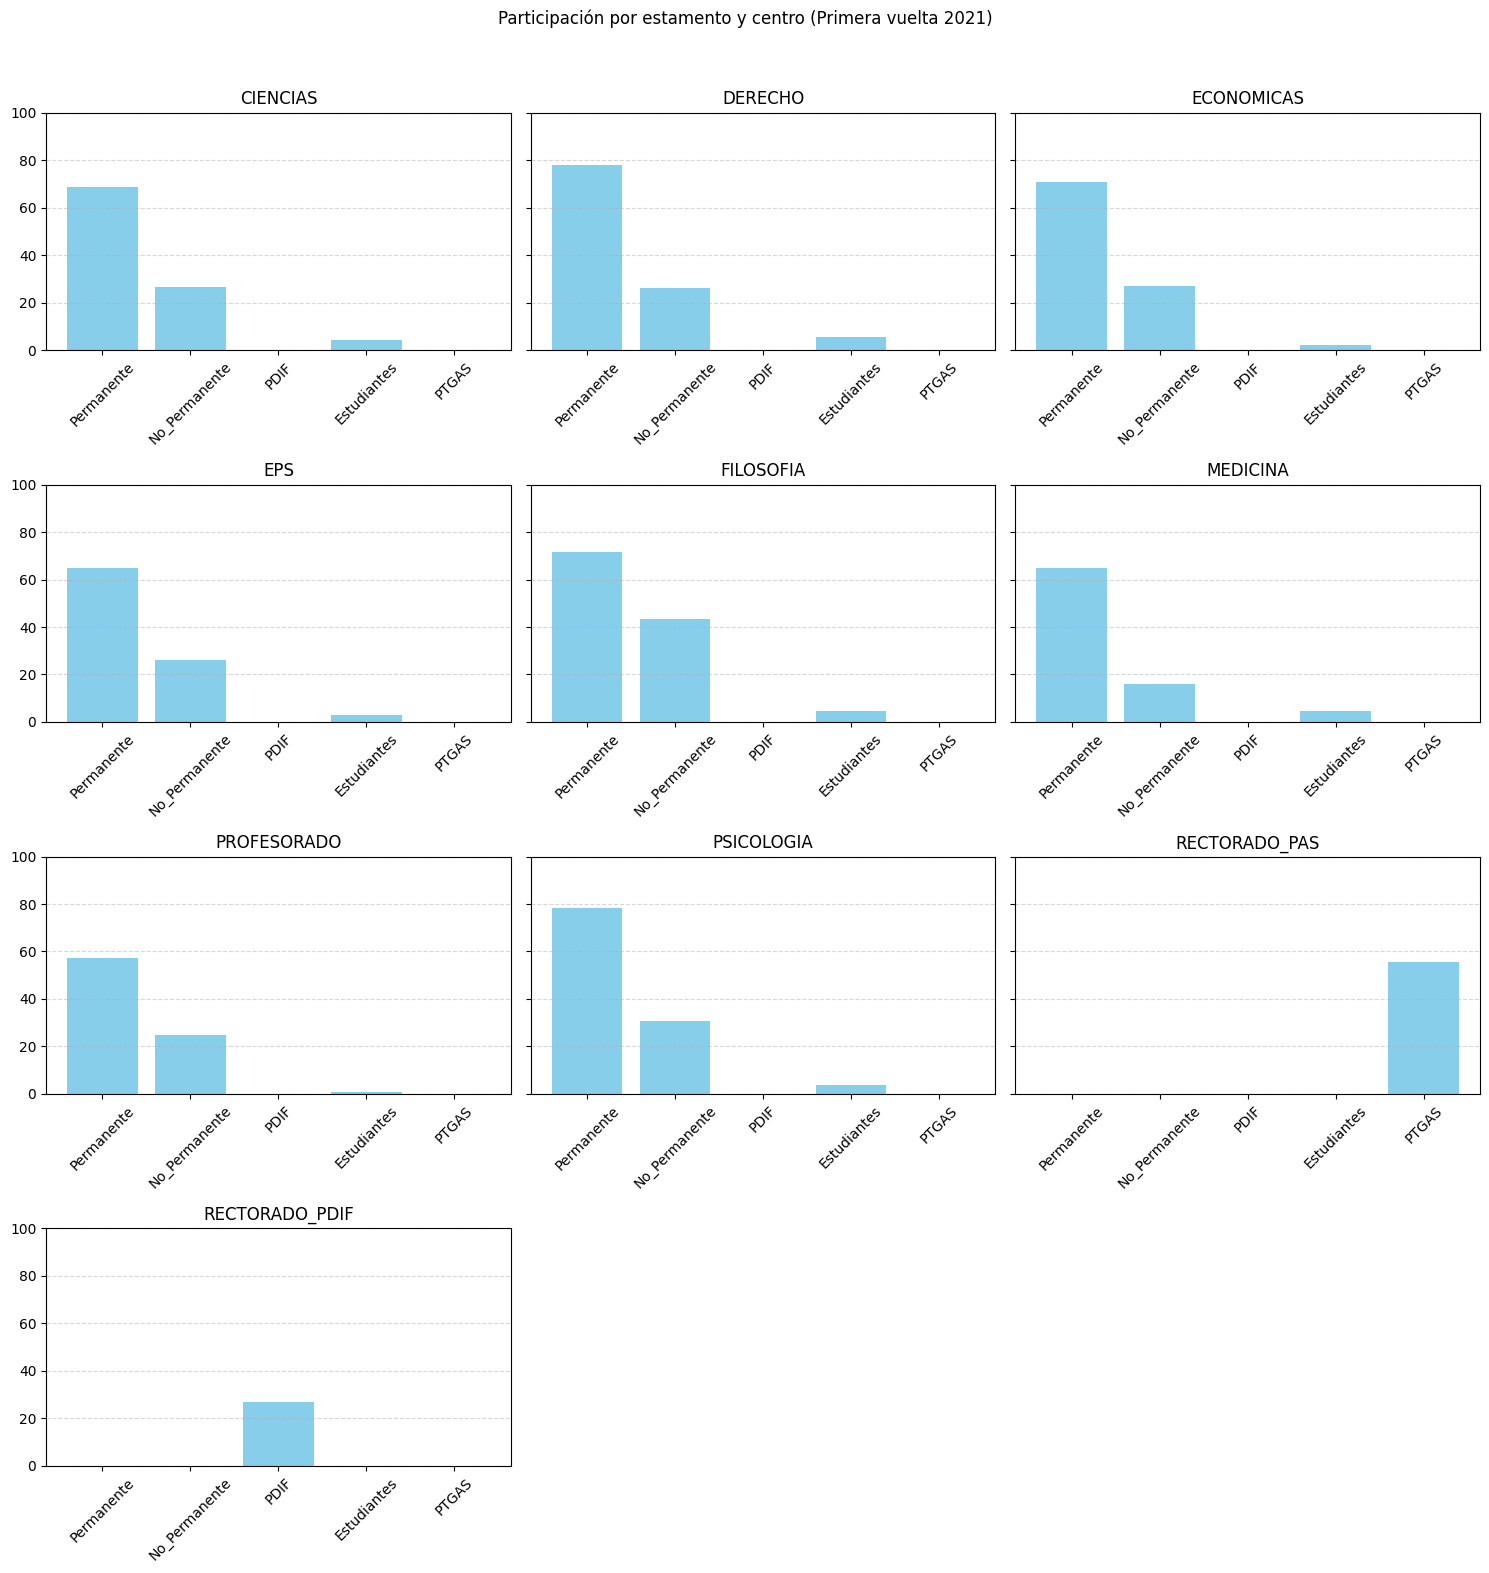

/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_27994/507484933.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valores = participacion_v2[centro].reindex(estamentos).fillna(0)


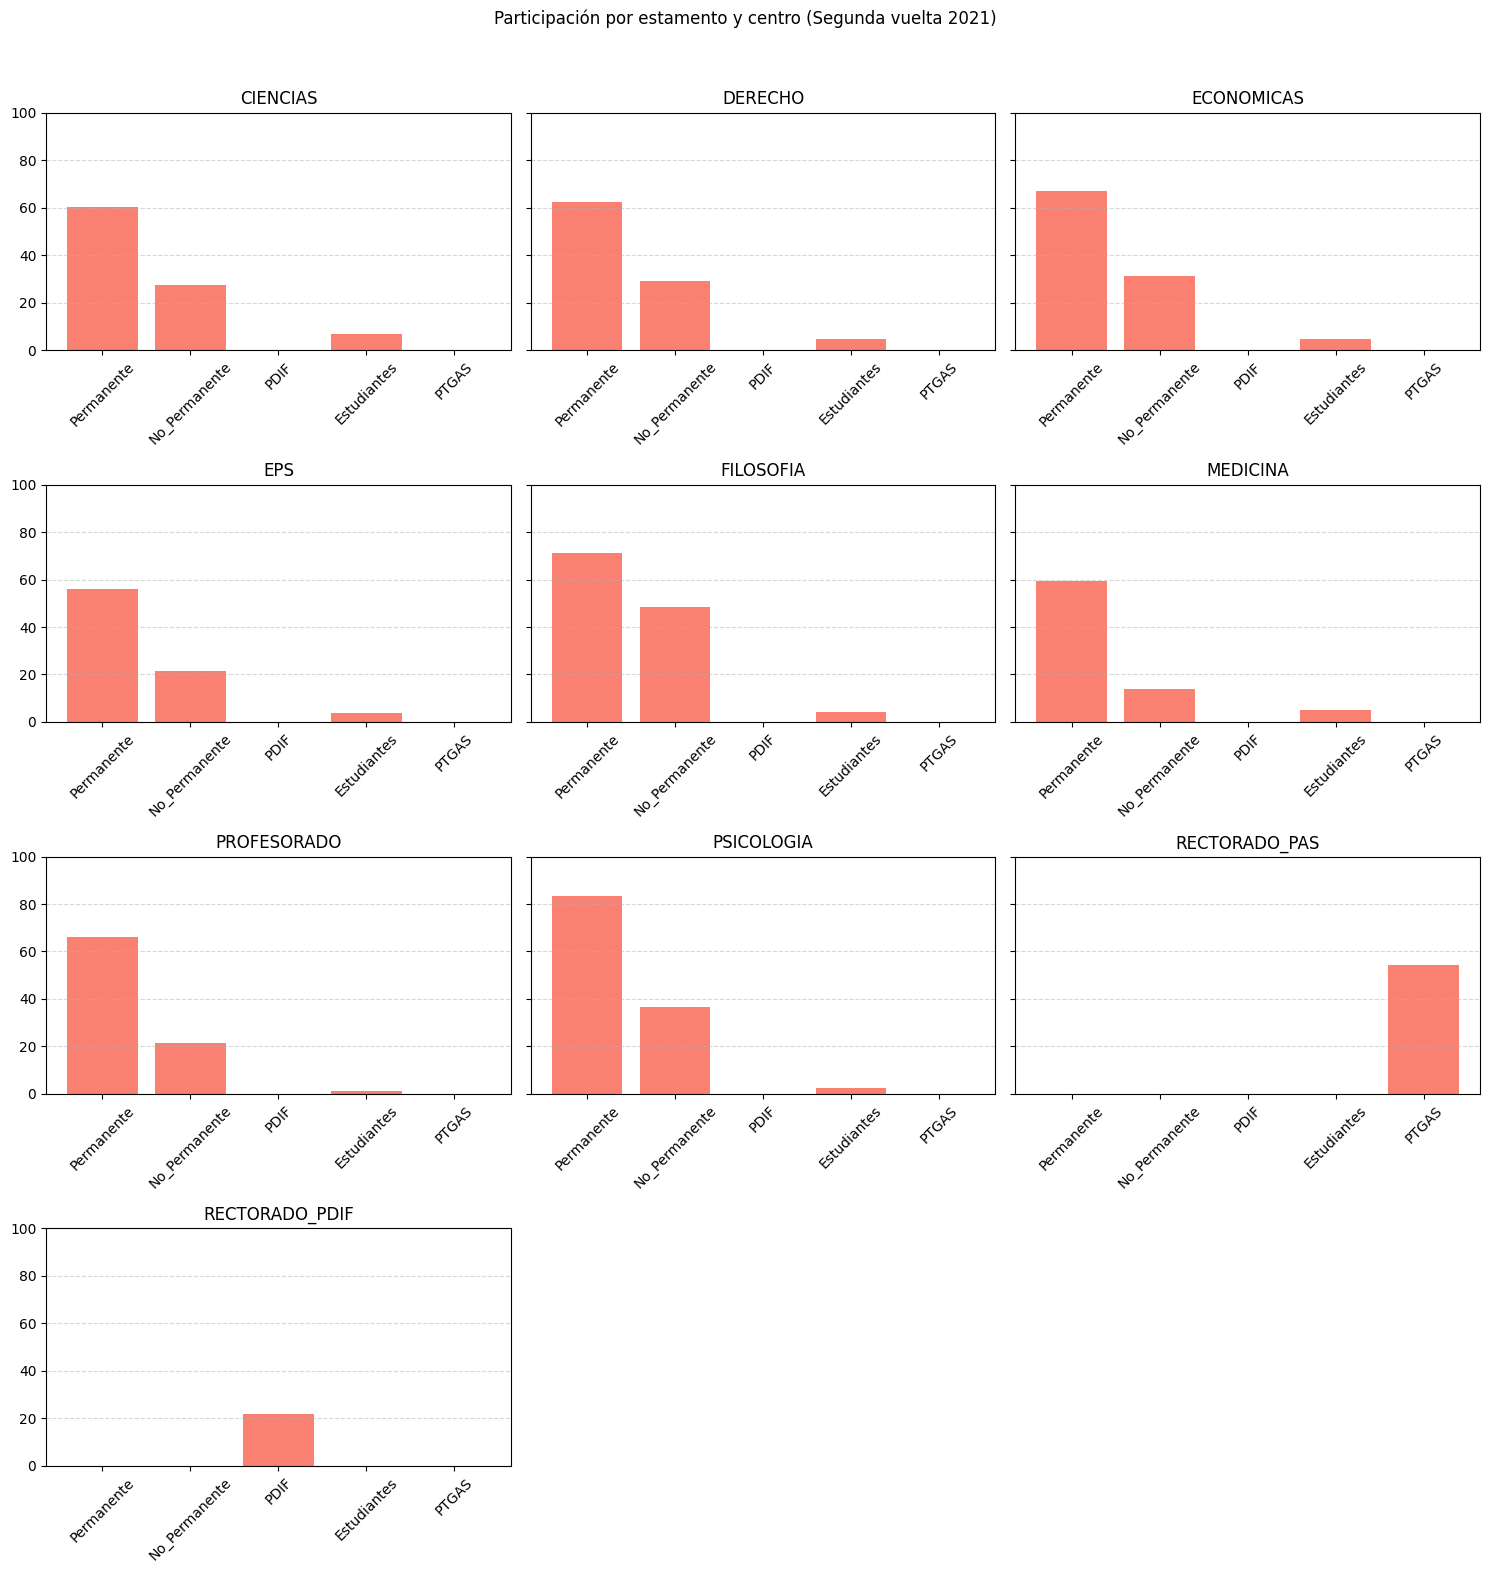

Primera vuelta: Centro con máxima participación: PSICOLOGIA, Estamento: Permanente, Porcentaje: 78.50%
Segunda vuelta: Centro con máxima participación: PSICOLOGIA, Estamento: Permanente, Porcentaje: 83.18%


In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import math

# Cargar datos de participación de 2021 (vuelta 1 y 2)
df_v1 = pd.read_csv('data/2021_v1_participation_data.csv', delimiter='\t')
df_v2 = pd.read_csv('data/2021_v2_participation_data.csv', delimiter='\t')

# Función para calcular porcentaje de participación por estamento y centro
def participacion_por_estamento_y_centro(df):
    centros = df['Center'].unique()
    resultados = {}
    for centro in centros:
        sub = df[df['Center'] == centro]
        censo = sub.groupby('Category')['Censo'].sum()
        votos = sub.groupby('Category')['Votos'].sum()
        porcentaje = 100 * votos / censo.replace(0, pd.NA)
        resultados[centro] = porcentaje
    return resultados

# Calcular resultados para ambas vueltas
participacion_v1 = participacion_por_estamento_y_centro(df_v1)
participacion_v2 = participacion_por_estamento_y_centro(df_v2)

# Obtener lista de centros y estamentos
centros = sorted(df_v1['Center'].unique())
estamentos = ['Permanente', 'No_Permanente', 'PDIF', 'Estudiantes', 'PTGAS']

# Crear subplots para la primera vuelta
n = len(centros)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
fig.suptitle('Participación por estamento y centro (Primera vuelta 2021)')
for i, centro in enumerate(centros):
    ax = axes.flat[i]
    valores = participacion_v1[centro].reindex(estamentos).fillna(0)
    ax.bar(estamentos, valores, color='skyblue')
    ax.set_title(centro)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
for j in range(i+1, rows*cols):
    axes.flat[j].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Crear subplots para la segunda vuelta
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
fig.suptitle('Participación por estamento y centro (Segunda vuelta 2021)')
for i, centro in enumerate(centros):
    ax = axes.flat[i]
    valores = participacion_v2[centro].reindex(estamentos).fillna(0)
    ax.bar(estamentos, valores, color='salmon')
    ax.set_title(centro)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
for j in range(i+1, rows*cols):
    axes.flat[j].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Encontrar centro y estamento con máxima participación en cada vuelta
max_v1 = (None, None, -1)
for centro, valores in participacion_v1.items():
    for est, val in valores.items():
        if pd.notna(val) and val > max_v1[2]:
            max_v1 = (centro, est, val)
max_v2 = (None, None, -1)
for centro, valores in participacion_v2.items():
    for est, val in valores.items():
        if pd.notna(val) and val > max_v2[2]:
            max_v2 = (centro, est, val)
print(f"Primera vuelta: Centro con máxima participación: {max_v1[0]}, Estamento: {max_v1[1]}, Porcentaje: {max_v1[2]:.2f}%")
print(f"Segunda vuelta: Centro con máxima participación: {max_v2[0]}, Estamento: {max_v2[1]}, Porcentaje: {max_v2[2]:.2f}%")

### **Apartado 2: Votos ponderados por candidatura y centro (2021)**

Representa los porcentajes de votos ponderados por candidato, desglosados por centro, tanto en la primera como en la segunda vuelta de las elecciones de 2021. Cada subplot debe corresponder a un centro distinto. 

- ¿En qué centro obtuvo el/la candidato/a ganador/a el mayor porcentaje de votos ponderados?

**Justificación de la visualización:**

Para analizar los votos ponderados por candidatura y centro, se utiliza una figura con subplots, donde cada subplot representa un centro distinto. Esta organización permite comparar visualmente el reparto de votos ponderados entre candidaturas dentro de cada centro y detectar en qué centros una candidatura ha tenido un apoyo especialmente destacado.

Se emplean gráficos de barras apiladas para mostrar el porcentaje de votos ponderados de cada candidatura en cada centro, facilitando la comparación tanto entre candidaturas como entre centros. Los colores diferenciados ayudan a identificar rápidamente a cada candidatura.

Esta visualización es adecuada porque:
- Permite comparar la distribución de votos ponderados entre candidaturas dentro de cada centro.
- Facilita la identificación de centros donde una candidatura ha obtenido un porcentaje especialmente alto.
- La disposición en subplots mejora la legibilidad cuando hay muchos centros.

A continuación se representa la distribución de votos ponderados por candidatura y centro para la primera y segunda vuelta de 2021, y se responde a la pregunta: ¿En qué centro obtuvo el/la candidato/a ganador/a el mayor porcentaje de votos ponderados?

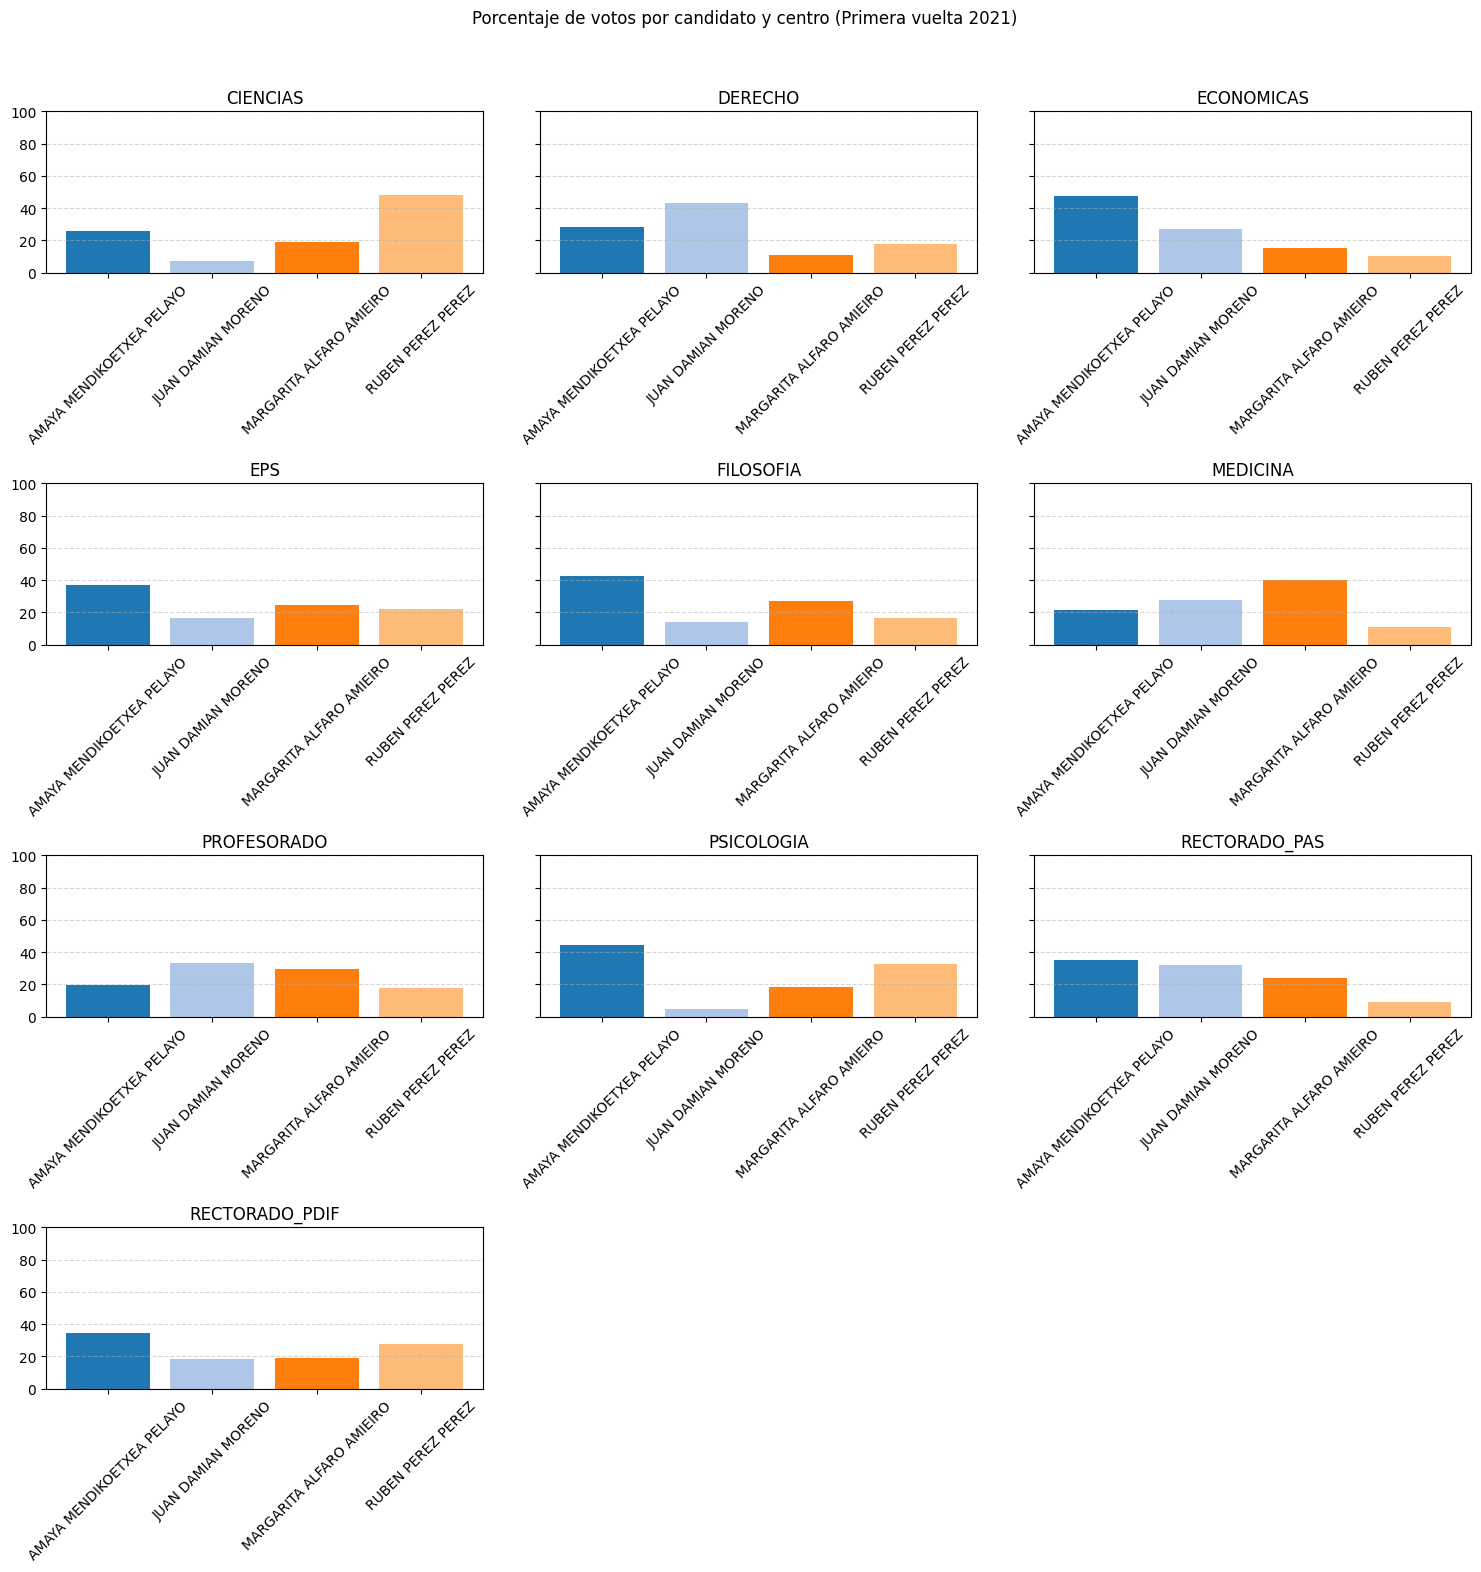

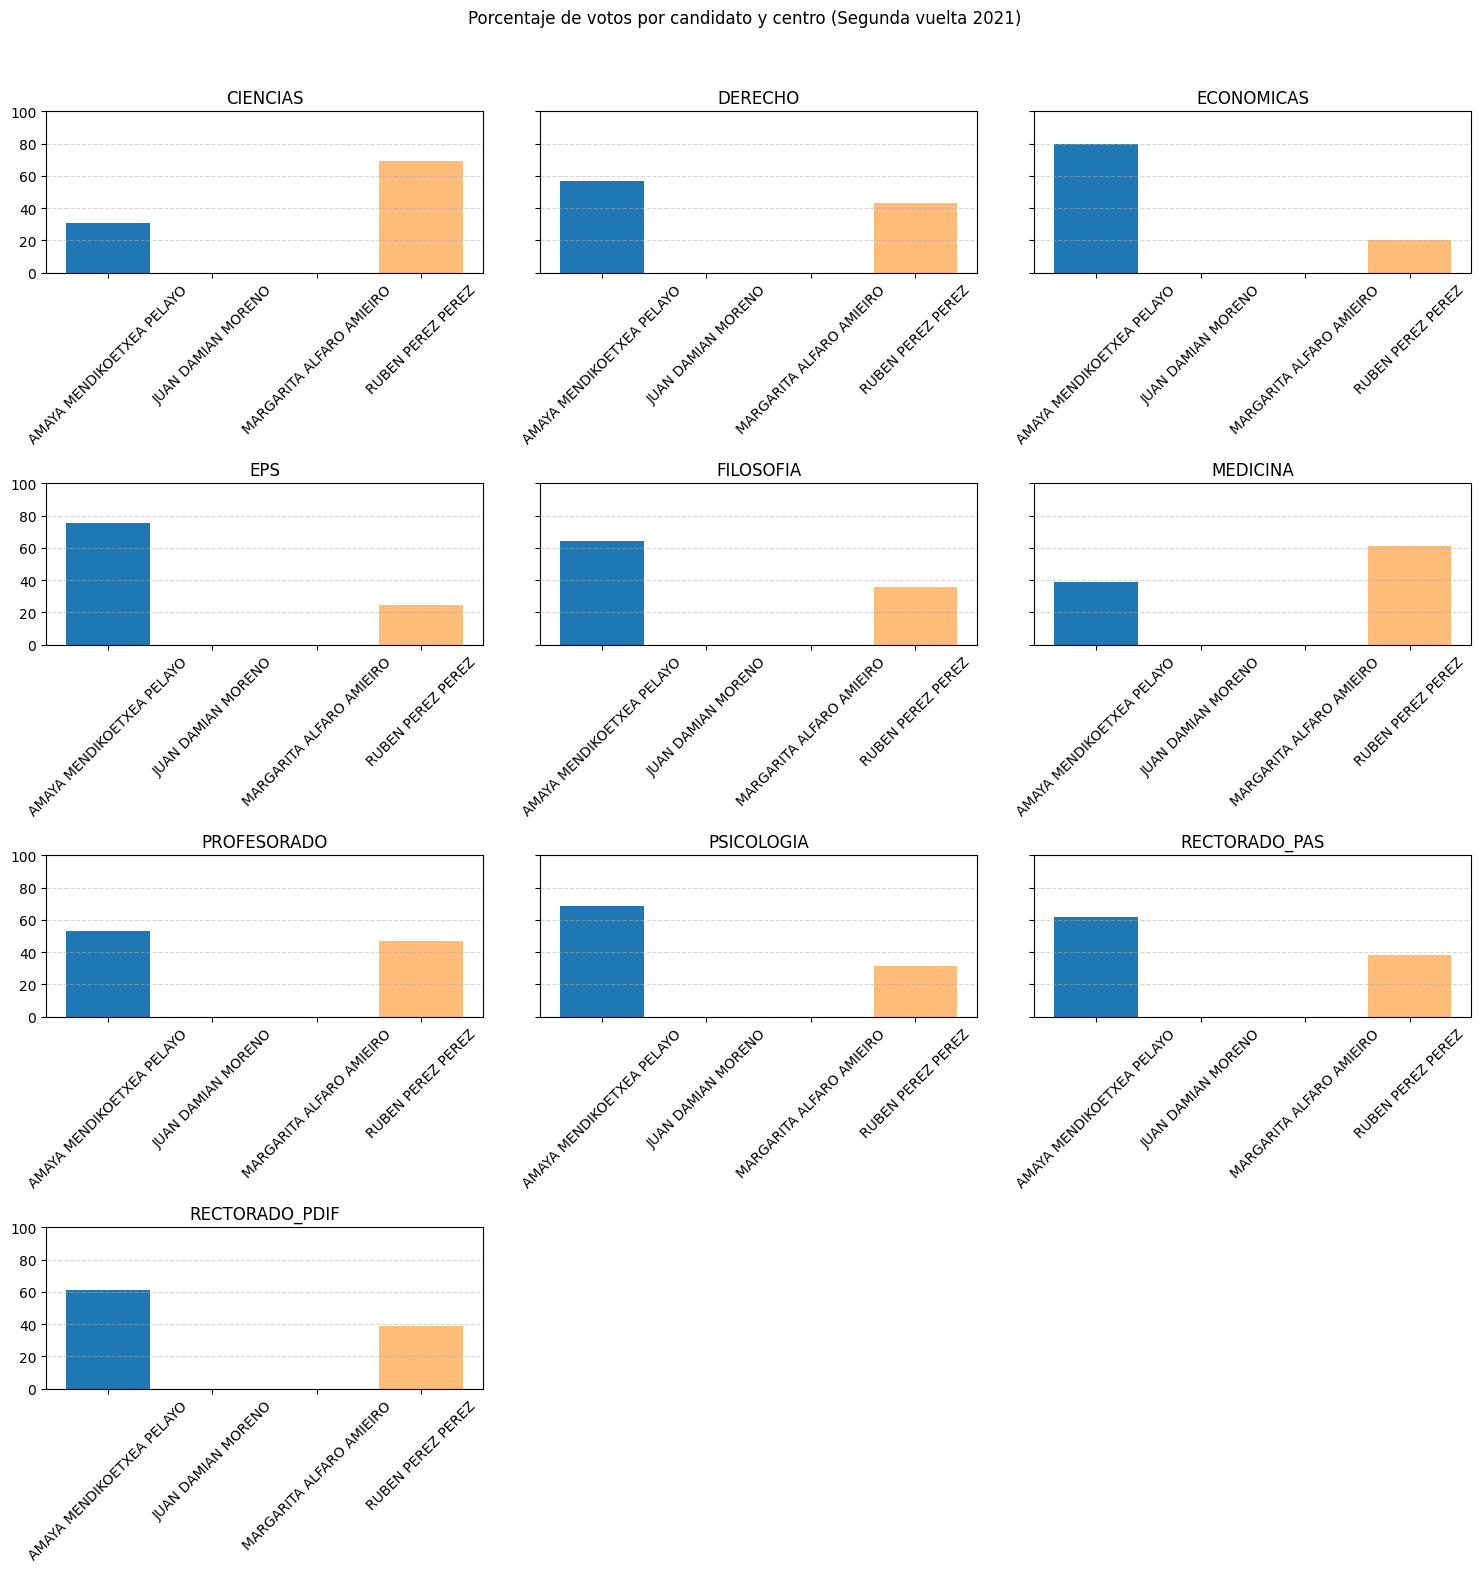

Primera vuelta: Centro con mayor porcentaje para candidato ganador: CIENCIAS, Candidato: RUBEN PEREZ PEREZ, Porcentaje: 48.17%
Segunda vuelta: Centro con mayor porcentaje para candidato ganador: ECONOMICAS, Candidato: AMAYA MENDIKOETXEA PELAYO, Porcentaje: 79.87%


In [2]:
# Importar y preparar datos de votos por candidato para 2021 (vuelta 1 y 2)
import pandas as pd
import matplotlib.pyplot as plt
import math

# Cargar datos de votos (ajustar el nombre de los archivos si es necesario)
df_v1 = pd.read_csv('data/2021_v1_votes_data.csv', delimiter='\t')
df_v2 = pd.read_csv('data/2021_v2_votes_data.csv', delimiter='\t')

# Función para calcular porcentaje de votos por candidato y centro
def votos_por_candidato_y_centro(df):
    centros = df['Center'].unique()
    candidatos = df['Candidate'].unique()
    resultados = {}
    for centro in centros:
        sub = df[df['Center'] == centro]
        total = sub['Votos'].sum()
        porcentajes = sub.groupby('Candidate')['Votos'].sum() / total * 100 if total > 0 else sub.groupby('Candidate')['Votos'].sum() * 0
        resultados[centro] = porcentajes
    return resultados, candidatos

# Calcular resultados para ambas vueltas
votos_v1, candidatos_v1 = votos_por_candidato_y_centro(df_v1)
votos_v2, candidatos_v2 = votos_por_candidato_y_centro(df_v2)

# Obtener lista de centros y candidatos (ordenados)
centros = sorted(df_v1['Center'].unique())
candidatos = sorted(list(set(candidatos_v1) | set(candidatos_v2)))

# Crear subplots para la primera vuelta
n = len(centros)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
fig.suptitle('Porcentaje de votos por candidato y centro (Primera vuelta 2021)')
for i, centro in enumerate(centros):
    ax = axes.flat[i]
    valores = votos_v1.get(centro, pd.Series(dtype=float)).reindex(candidatos).fillna(0)
    ax.bar(candidatos, valores, color=plt.cm.tab20.colors[:len(candidatos)])
    ax.set_title(centro)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
for j in range(i+1, rows*cols):
    axes.flat[j].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Crear subplots para la segunda vuelta
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
fig.suptitle('Porcentaje de votos por candidato y centro (Segunda vuelta 2021)')
for i, centro in enumerate(centros):
    ax = axes.flat[i]
    valores = votos_v2.get(centro, pd.Series(dtype=float)).reindex(candidatos).fillna(0)
    ax.bar(candidatos, valores, color=plt.cm.tab20.colors[:len(candidatos)])
    ax.set_title(centro)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
for j in range(i+1, rows*cols):
    axes.flat[j].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Encontrar centro y candidato con mayor porcentaje de votos en cada vuelta
max_v1 = (None, None, -1)
for centro, valores in votos_v1.items():
    for cand, val in valores.items():
        if pd.notna(val) and val > max_v1[2]:
            max_v1 = (centro, cand, val)
max_v2 = (None, None, -1)
for centro, valores in votos_v2.items():
    for cand, val in valores.items():
        if pd.notna(val) and val > max_v2[2]:
            max_v2 = (centro, cand, val)
print(f"Primera vuelta: Centro con mayor porcentaje para candidato ganador: {max_v1[0]}, Candidato: {max_v1[1]}, Porcentaje: {max_v1[2]:.2f}%")
print(f"Segunda vuelta: Centro con mayor porcentaje para candidato ganador: {max_v2[0]}, Candidato: {max_v2[1]}, Porcentaje: {max_v2[2]:.2f}%")

### **Apartado 3: Histórico de participación por estamento y centro (2017–2025)**

Representa la evolución de la participación de cada estamento en todas las elecciones, pero desglosada por centro. Cada subplot debe mostrar los resultados históricos de un centro. 

Responde a la siguiente pregunta: 
- ¿En qué año, centro y estamento se obtuvo la mínima y la máxima participación?

**Justificación de la visualización:**

Para analizar la evolución histórica de la participación por estamento y centro, se utiliza una figura con subplots, donde cada subplot representa un centro distinto y en cada uno se muestran las líneas de participación de los diferentes estamentos a lo largo de los años. Esta organización permite comparar tendencias temporales entre estamentos dentro de cada centro y detectar patrones o anomalías a lo largo de las distintas convocatorias electorales.

Se emplean gráficos de líneas para cada estamento, ya que facilitan la visualización de la evolución temporal y la comparación entre estamentos. Los colores diferenciados ayudan a identificar rápidamente cada estamento.

Esta visualización es adecuada porque:
- Permite comparar la evolución de la participación entre estamentos dentro de cada centro.
- Facilita la identificación de años, centros y estamentos con valores extremos de participación.
- La disposición en subplots mejora la legibilidad cuando hay muchos centros.

A continuación se representa la evolución histórica de la participación por estamento y centro, y se responde a la pregunta: ¿En qué año, centro y estamento se obtuvo la mínima y la máxima participación?

/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_27994/2188124360.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.plot(df.index, df[est].fillna(0), marker='o', label=est, color=colores[idx % len(colores)])


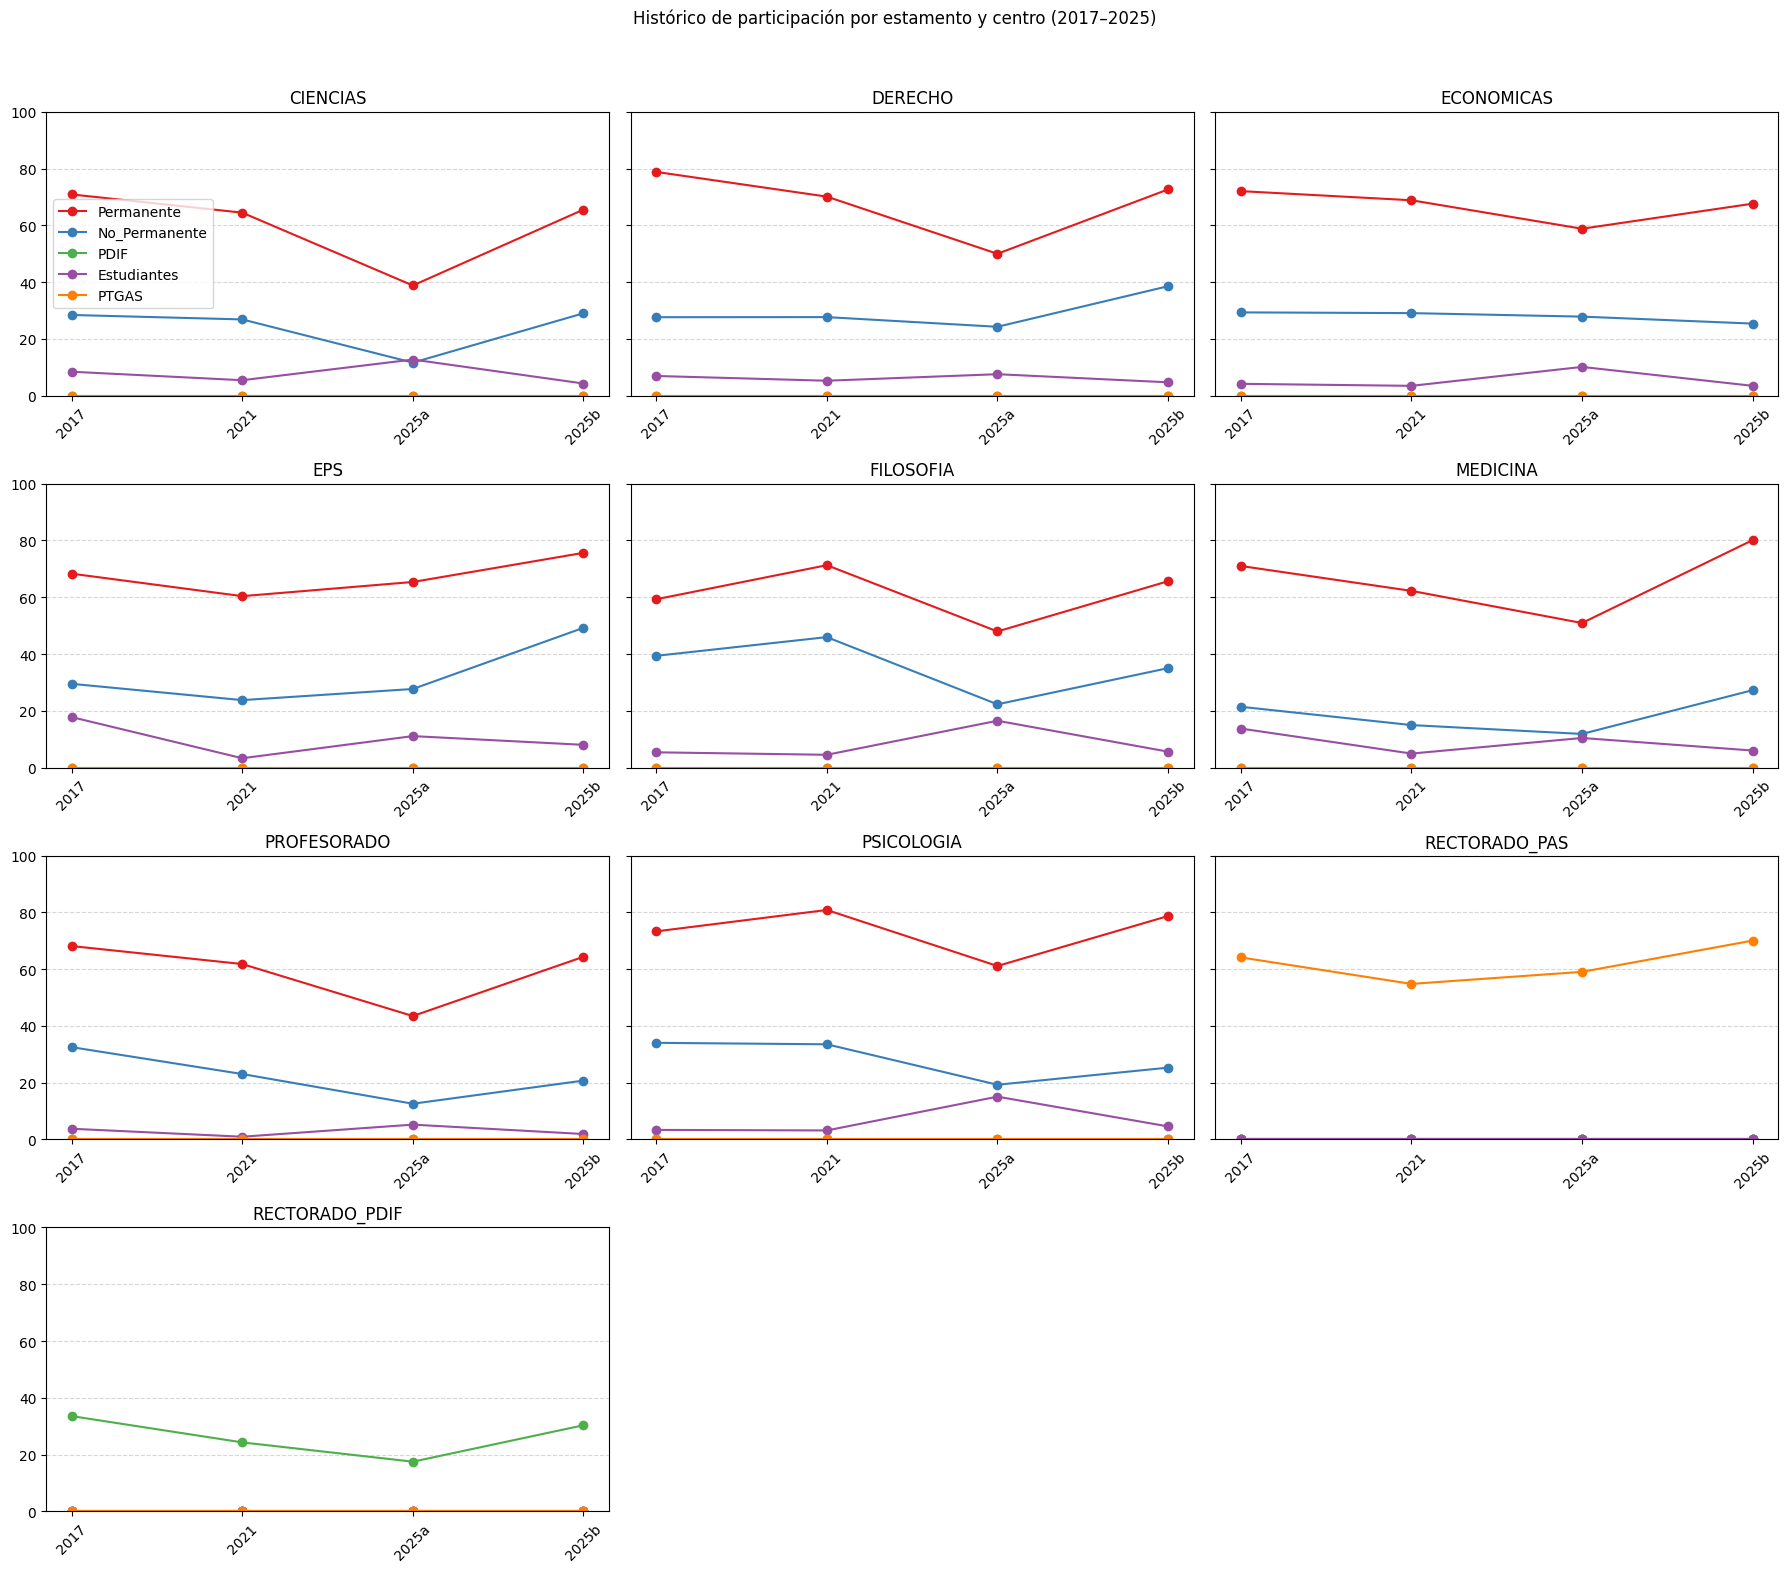

Mínima participación: Año 2021, Centro PROFESORADO, Estamento Estudiantes, Porcentaje: 0.97%
Máxima participación: Año 2021, Centro PSICOLOGIA, Estamento Permanente, Porcentaje: 80.84%


In [3]:
# Importar y preparar datos históricos de participación por estamento y centro (2017–2025)
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob
import os

# Archivos de participación por año y vuelta
def archivos_participacion():
    files = glob.glob('data/*_participation_data.csv')
    return sorted(files)

# Leer y combinar todos los datos históricos
def cargar_datos_historicos():
    files = archivos_participacion()
    data = []
    for f in files:
        # Extraer año y vuelta del nombre del archivo
        base = os.path.basename(f)
        partes = base.split('_')
        year = partes[0]
        vuelta = partes[1] if len(partes) > 2 else 'v1'
        df = pd.read_csv(f, delimiter='\t')
        df['Año'] = year
        df['Vuelta'] = vuelta
        data.append(df)
    return pd.concat(data, ignore_index=True)

# Cargar datos
historico = cargar_datos_historicos()

# Listas de centros, estamentos y años
centros = sorted(historico['Center'].unique())
estamentos = ['Permanente', 'No_Permanente', 'PDIF', 'Estudiantes', 'PTGAS']
años = sorted(historico['Año'].unique())

# Crear estructura: {centro: DataFrame con index año, columns estamento, values porcentaje}
participacion_centro = {}
for centro in centros:
    sub = historico[historico['Center'] == centro]
    tabla = sub.groupby(['Año', 'Category'])[['Censo', 'Votos']].sum().reset_index()
    tabla['Porcentaje'] = 100 * tabla['Votos'] / tabla['Censo'].replace(0, pd.NA)
    pivot = tabla.pivot(index='Año', columns='Category', values='Porcentaje').reindex(columns=estamentos)
    participacion_centro[centro] = pivot

# Crear subplots
n = len(centros)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), sharey=True)
fig.suptitle('Histórico de participación por estamento y centro (2017–2025)')
colores = plt.cm.Set1.colors
for i, centro in enumerate(centros):
    ax = axes.flat[i]
    df = participacion_centro[centro]
    for idx, est in enumerate(estamentos):
        ax.plot(df.index, df[est].fillna(0), marker='o', label=est, color=colores[idx % len(colores)])
    ax.set_title(centro)
    ax.set_ylim(0, 100)
    ax.set_xticks(df.index)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if i == 0:
        ax.legend()
for j in range(i+1, rows*cols):
    axes.flat[j].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Encontrar año, centro y estamento con mínima y máxima participación
min_part = (None, None, None, 101)
max_part = (None, None, None, -1)
for centro, df in participacion_centro.items():
    for est in estamentos:
        for año in df.index:
            val = df.loc[año, est]
            if pd.notna(val):
                if val < min_part[3]:
                    min_part = (año, centro, est, val)
                if val > max_part[3]:
                    max_part = (año, centro, est, val)
print(f"Mínima participación: Año {min_part[0]}, Centro {min_part[1]}, Estamento {min_part[2]}, Porcentaje: {min_part[3]:.2f}%")
print(f"Máxima participación: Año {max_part[0]}, Centro {max_part[1]}, Estamento {max_part[2]}, Porcentaje: {max_part[3]:.2f}%")

### **Apartado 4: Exportación de las gráficas**
Exporta las gráficas de los Apartados 1-3 en ficheros PDF. Las gráficas deben tener la mejor calidad de imagen posible.

**Justificación de la exportación:**

La exportación de las gráficas en formato PDF permite conservar la máxima calidad de imagen, facilitando su inclusión en informes, presentaciones o documentos impresos. El formato PDF es ampliamente compatible y asegura que los detalles visuales, colores y textos se mantengan nítidos independientemente del dispositivo o el tamaño de impresión.

In [5]:
# Exportar las gráficas de los apartados 1-3 en PDF de alta calidad
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob
import os

# --- APARTADO 1: Participación por estamento y centro (Primera y Segunda vuelta 2021) ---
def exportar_apartado1():
    df_v1 = pd.read_csv('data/2021_v1_participation_data.csv', delimiter='\t')
    df_v2 = pd.read_csv('data/2021_v2_participation_data.csv', delimiter='\t')
    centros = sorted(df_v1['Center'].unique())
    estamentos = ['Permanente', 'No_Permanente', 'PDIF', 'Estudiantes', 'PTGAS']
    n = len(centros)
    cols = 3
    rows = math.ceil(n / cols)
    # Primera vuelta
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
    fig.suptitle('Participación por estamento y centro (Primera vuelta 2021)')
    participacion_v1 = {}
    for centro in centros:
        sub = df_v1[df_v1['Center'] == centro]
        censo = sub.groupby('Category')['Censo'].sum()
        votos = sub.groupby('Category')['Votos'].sum()
        porcentaje = 100 * votos / censo.replace(0, pd.NA)
        participacion_v1[centro] = porcentaje
    for i, centro in enumerate(centros):
        ax = axes.flat[i]
        valores = participacion_v1[centro].reindex(estamentos).fillna(0)
        ax.bar(estamentos, valores, color='skyblue')
        ax.set_title(centro)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig('apartado1_primera_vuelta.pdf', bbox_inches='tight')
    plt.close(fig)
    # Segunda vuelta
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
    fig.suptitle('Participación por estamento y centro (Segunda vuelta 2021)')
    participacion_v2 = {}
    for centro in centros:
        sub = df_v2[df_v2['Center'] == centro]
        censo = sub.groupby('Category')['Censo'].sum()
        votos = sub.groupby('Category')['Votos'].sum()
        porcentaje = 100 * votos / censo.replace(0, pd.NA)
        participacion_v2[centro] = porcentaje
    for i, centro in enumerate(centros):
        ax = axes.flat[i]
        valores = participacion_v2[centro].reindex(estamentos).fillna(0)
        ax.bar(estamentos, valores, color='salmon')
        ax.set_title(centro)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig('apartado1_segunda_vuelta.pdf', bbox_inches='tight')
    plt.close(fig)

# --- APARTADO 2: Votos por candidato y centro (Primera y Segunda vuelta 2021) ---
def exportar_apartado2():
    df_v1 = pd.read_csv('data/2021_v1_votes_data.csv', delimiter='\t')
    df_v2 = pd.read_csv('data/2021_v2_votes_data.csv', delimiter='\t')
    centros = sorted(df_v1['Center'].unique())
    candidatos = sorted(list(set(df_v1['Candidate'].unique()) | set(df_v2['Candidate'].unique())))
    n = len(centros)
    cols = 3
    rows = math.ceil(n / cols)
    # Primera vuelta
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
    fig.suptitle('Porcentaje de votos por candidato y centro (Primera vuelta 2021)')
    for i, centro in enumerate(centros):
        ax = axes.flat[i]
        sub = df_v1[df_v1['Center'] == centro]
        total = sub['Votos'].sum()
        valores = sub.groupby('Candidate')['Votos'].sum() / total * 100 if total > 0 else sub.groupby('Candidate')['Votos'].sum() * 0
        valores = valores.reindex(candidatos).fillna(0)
        ax.bar(candidatos, valores, color=plt.cm.tab20.colors[:len(candidatos)])
        ax.set_title(centro)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig('apartado2_primera_vuelta.pdf', bbox_inches='tight')
    plt.close(fig)
    # Segunda vuelta
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)
    fig.suptitle('Porcentaje de votos por candidato y centro (Segunda vuelta 2021)')
    for i, centro in enumerate(centros):
        ax = axes.flat[i]
        sub = df_v2[df_v2['Center'] == centro]
        total = sub['Votos'].sum()
        valores = sub.groupby('Candidate')['Votos'].sum() / total * 100 if total > 0 else sub.groupby('Candidate')['Votos'].sum() * 0
        valores = valores.reindex(candidatos).fillna(0)
        ax.bar(candidatos, valores, color=plt.cm.tab20.colors[:len(candidatos)])
        ax.set_title(centro)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig('apartado2_segunda_vuelta.pdf', bbox_inches='tight')
    plt.close(fig)

# --- APARTADO 3: Histórico de participación por estamento y centro ---
def exportar_apartado3():
    import glob
    import os
    files = glob.glob('data/*_participation_data.csv')
    historico = []
    for f in sorted(files):
        base = os.path.basename(f)
        partes = base.split('_')
        year = partes[0]
        vuelta = partes[1] if len(partes) > 2 else 'v1'
        df = pd.read_csv(f, delimiter='\t')
        df['Año'] = year
        df['Vuelta'] = vuelta
        historico.append(df)
    historico = pd.concat(historico, ignore_index=True)
    centros = sorted(historico['Center'].unique())
    estamentos = ['Permanente', 'No_Permanente', 'PDIF', 'Estudiantes', 'PTGAS']
    participacion_centro = {}
    for centro in centros:
        sub = historico[historico['Center'] == centro]
        tabla = sub.groupby(['Año', 'Category'])[['Censo', 'Votos']].sum().reset_index()
        tabla['Porcentaje'] = 100 * tabla['Votos'] / tabla['Censo'].replace(0, pd.NA)
        pivot = tabla.pivot(index='Año', columns='Category', values='Porcentaje').reindex(columns=estamentos)
        participacion_centro[centro] = pivot
    n = len(centros)
    cols = 3
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), sharey=True)
    fig.suptitle('Histórico de participación por estamento y centro (2017–2025)')
    colores = plt.cm.Set1.colors
    for i, centro in enumerate(centros):
        ax = axes.flat[i]
        df = participacion_centro[centro]
        for idx, est in enumerate(estamentos):
            ax.plot(df.index, df[est].fillna(0), marker='o', label=est, color=colores[idx % len(colores)])
        ax.set_title(centro)
        ax.set_ylim(0, 100)
        ax.set_xticks(df.index)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        if i == 0:
            ax.legend()
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig('apartado3_historico_participacion.pdf', bbox_inches='tight')
    plt.close(fig)

# Ejecutar exportación
def exportar_todas():
    exportar_apartado1()
    exportar_apartado2()
    exportar_apartado3()
    print('Gráficas exportadas en PDF: apartado1_primera_vuelta.pdf, apartado1_segunda_vuelta.pdf, apartado2_primera_vuelta.pdf, apartado2_segunda_vuelta.pdf, apartado3_historico_participacion.pdf')

# Llama a esta función para exportar todas las gráficas
def exportar_graficas():
    exportar_todas()

# Descomenta la siguiente línea para exportar directamente al ejecutar la celda
exportar_graficas()

/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_27994/3163168587.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valores = participacion_v1[centro].reindex(estamentos).fillna(0)
/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_27994/3163168587.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valores = participacion_v2[centro].reindex(estamentos).fillna(0)
/var/folders/m4/xw4bhk_9611ck85ym_vjt4rr0000gn/T/ipykernel_27994/3163168587.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated a

Gráficas exportadas en PDF: apartado1_primera_vuelta.pdf, apartado1_segunda_vuelta.pdf, apartado2_primera_vuelta.pdf, apartado2_segunda_vuelta.pdf, apartado3_historico_participacion.pdf
